In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models

In [145]:
obesity = pd.read_csv('/content/ObesityDataSet_onehot.csv')
obesity

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,...,0,1,0,0,1,0,0,0,0,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,...,0,1,0,0,1,0,0,0,0,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,1,...,0,1,0,0,1,0,0,0,0,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,0,...,0,1,0,0,0,0,0,1,0,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,0,...,0,1,0,0,0,0,0,1,0,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,0,...,0,1,0,0,0,0,0,1,0,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,0,...,0,1,0,0,0,0,0,1,0,0


In [146]:
target_col_prefix = "NObeyesdad_"
# Identify all one-hot encoded target columns
target_onehot_cols = [col for col in obesity.columns if col.startswith(target_col_prefix)]

# Reconstruct the single categorical target column `y`
y = obesity[target_onehot_cols].idxmax(axis=1).str.replace(target_col_prefix, '')

# Drop the one-hot encoded target columns from X
X = obesity.drop(columns=target_onehot_cols)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [148]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print('Categorical:', cat_cols)
print('Numerical:', num_cols)

Categorical: []
Numerical: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [149]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

In [150]:
X_train_pre = preprocess.fit_transform(X_train)
X_test_pre = preprocess.transform(X_test)

In [151]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_pre)
X_test_pca = pca.transform(X_test_pre)

print('Original number of features:', X_train_pre.shape[1])
print('Reduced number of features:', X_train_pca.shape[1])

Original number of features: 31
Reduced number of features: 20


In [152]:
label_enc = LabelEncoder()
y_train_int = label_enc.fit_transform(y_train)
y_test_int = label_enc.transform(y_test)

num_classes = len(label_enc.classes_)
y_train_oh = tf.keras.utils.to_categorical(y_train_int, num_classes)
y_test_oh = tf.keras.utils.to_categorical(y_test_int, num_classes)

print('Classes:', label_enc.classes_)
print('Train shape:', y_train_oh.shape)

Classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
Train shape: (1688, 7)


In [153]:
input_dim = X_train_pca.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.21 KB)

 Trainable params: 4,151 (16.21 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
history = model.fit(
    X_train_pca,
    y_train_oh,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# early stopping to reduce overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1344 - loss: 1.9467 - val_accuracy: 0.1450 - val_loss: 1.8541
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1802 - loss: 1.8166 - val_accuracy: 0.2544 - val_loss: 1.6974
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 1.6473 - val_accuracy: 0.4911 - val_loss: 1.4111
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4809 - loss: 1.3616 - val_accuracy: 0.5473 - val_loss: 1.2005
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5641 - loss: 1.1354 - val_accuracy: 0.5740 - val_loss: 1.0691
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5971 - loss: 1.0019 - val_accuracy: 0.6154 - val_loss: 0.9911
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - loss: 0.8906 - val_accuracy: 0.6538 - val_loss: 0.9355
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6858 - loss: 0.8386 - val_accuracy: 0.6627 - val_loss

In [155]:
test_loss, test_acc = model.evaluate(X_test_pca, y_test_oh, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.8156


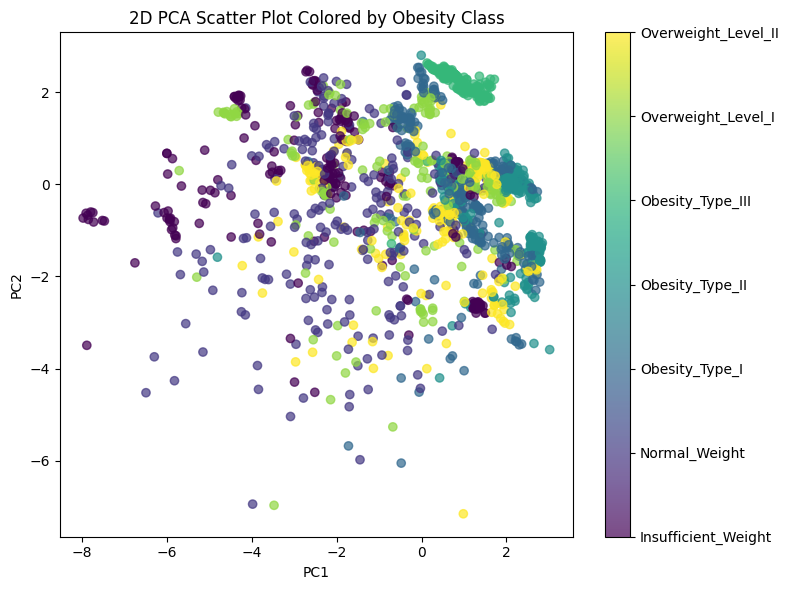

In [156]:
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2)
X_train_pca2 = pca_2d.fit_transform(X_train_pre)

# Encode the class labels to integers for coloring
label_enc = LabelEncoder()
y_train_int = label_enc.fit_transform(y_train)
class_names = label_enc.classes_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca2[:, 0],
    X_train_pca2[:, 1],
    c=y_train_int,
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Scatter Plot Colored by Obesity Class")
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(class_names)))
cbar.set_ticklabels(class_names)
plt.tight_layout()
plt.show()

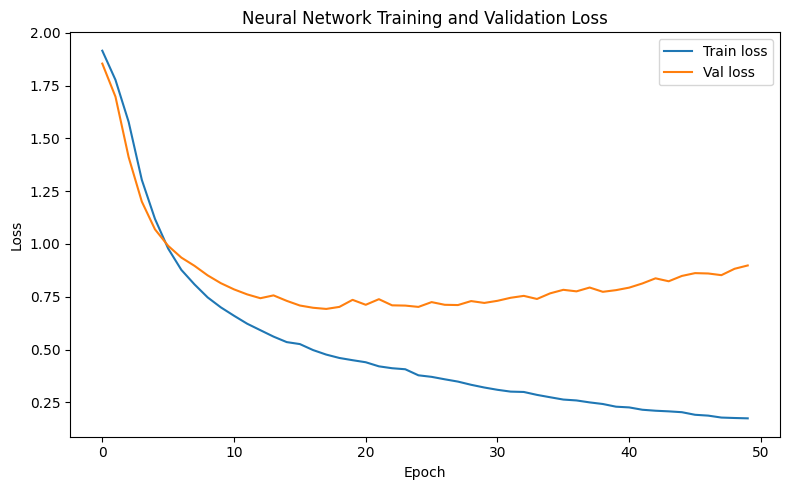

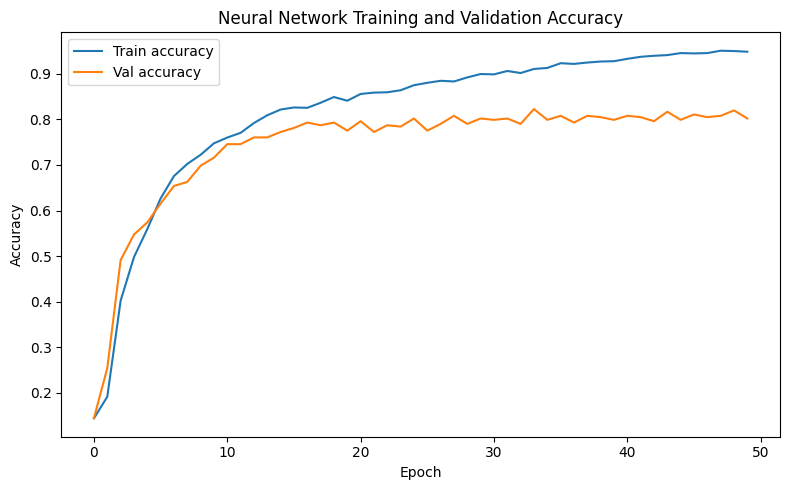

In [157]:
# Plot training curves: loss and accuracy
# ---------------------------------------------------
# Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Neural Network Training and Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Neural Network Training and Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()